# Reading Activity 14 - Bayesian Linear Regression

## Objectives

+ Understand the probabilistic interpretation of least squares
+ Use regularization to avoid overfitting
+ Use Bayesian regression to quantify epistemic uncertainty induced by limited data
+ Introduce the concept of point-predictive distribution

## Probabilistic regression I (maximum likelihood)

This first version of probabilistic regression, maximum likelihood, is identical to least squares but gives you the ability to estimate the measurement noise.

We wish to model the data using some **fixed** basis/features:
$$
y(\mathbf{x};\mathbf{w}) = \sum_{j=1}^{m} w_{j}\phi_{j}(\mathbf{x}) = \mathbf{w}^T\boldsymbol{\phi}(\mathbf{x})
$$
However, instead of directly picking a loss function to minimize we come up with a probabilistic description of the measurement process.
In particular, we *model the measurement process* using a **likelihood** function:
$$
\mathbf{y}_{1:n} | \mathbf{x}_{1:n}, \mathbf{w} \sim p(\mathbf{y}_{1:n}|\mathbf{x}_{1:n}, \mathbf{w}).
$$

What is the interpretation of the likelihood function?
Well, $p(\mathbf{y}_{1:n} | \mathbf{x}_{1:n}, \mathbf{w})$ tells us how plausible is it to observe $\mathbf{y}_{1:n}$ at inputs $\mathbf{x}_{1:n}$, if we know that the model parameters are $\mathbf{w}$.

Since, in almost all the cases we consider, the measurements are independent conditioned on the model, then likelihood of the data factorizes as follows:
$$
p(\mathbf{y}_{1:n}|\mathbf{x}_{1:n}, \mathbf{w}) = \prod_{i=1}^np(y_i|\mathbf{x}_i, \mathbf{w}),
$$
where $p(y_i|\mathbf{x}_i,\mathbf{w})$ is the likelihood of a single measurement.

The most common choice for the likehood of a single measurement is to pick it to be Gaussian.
We assign:
$$
\begin{array}{ccc}
p(y_i|\mathbf{x}_i, \mathbf{w}, \sigma) &=& \mathcal{N}\left(y_i| y(\mathbf{x}_i;\mathbf{w}), \sigma^2\right)\\
&=& \mathcal{N}\left(y_i | \mathbf{w^{T}\boldsymbol{\phi}(\mathbf{x}_i)}, \sigma^2\right),
\end{array}
$$
where $\sigma$ models the **noise**.
This correspond to the belief that our measurement is around the model prediction $\mathbf{w^{T}\boldsymbol{\phi}(\mathbf{x})}$
but it is contaminated with Gaussian noice of variance $\sigma^2$.

Assuming a Gaussian likelihood for a single observation, we have for all the data:
$$
p(\mathbf{y}_{1:n} | \mathbf{x}_{1:n}, \mathbf{w}, \sigma) = \mathcal{N}\left(\mathbf{y}_{1:n} | \mathbf{\Phi}\mathbf{w}, \sigma^2\mathbf{I}_n\right).
$$
Let's look up the form of the multivariate Gaussian from the ([Wiki](https://en.wikipedia.org/wiki/Multivariate_normal_distribution)):
$$
p(\mathbf{y}_{1:n} | \mathbf{x}_{1:n}, \mathbf{w}, \sigma) 
= (2\pi)^{-\frac{n}{2}}\sigma^{-n} e^{-\frac{1}{2\sigma^2}\lVert\mathbf{\Phi}\mathbf{w}-\mathbf{y}_{1:n}\rVert^2}.
$$

### Maximum Likelihood Estimate of $\mathbf{w}$

Once we have a likelihood, we can train the model by maximizing the likelihood:
$$
\mathbf{w}_{\mbox{MLE}} = \arg\max_{\mathbf{w}} p(\mathbf{y}_{1:n}, |\mathbf{x}_{1:n}, \mathbf{w}, \sigma).
$$
When we do this we are essentially selecting the model that makes the observations most likely.
For the Gaussian likelihood, we have:
$$
\log p(\mathbf{y}_{1:n}, |\mathbf{x}_{1:n}, \mathbf{w}, \sigma) =
-\frac{n}{2}\log(2\pi)
-n\log\sigma
- \frac{1}{2\sigma^2}\lVert\mathbf{\Phi}\mathbf{w}-\mathbf{y}_{1:n}\rVert^2.
$$
Taking the derivatives of this expression with respect to $\mathbf{w}$ and setting them equal to zero (sufficient condition) yields the same solution as least squares.
$$
\mathbf{w}_{\mbox{MLE}} \equiv \mathbf{w}_{\mbox{LS}}.
$$

### Maximum Likelihood Estimate of $\sigma$
The probabilistic interpretation above gives the same solution as least squares.
To start undersanding its power, notice that it can also give us an estimate for the measurement noise variance $\sigma^2$.
All you have to do is maximize likelihood with respect to $\sigma$.
For the Gaussian likelihood:

+ Take the derivative of $p(\mathbf{y}_{1:n}|\mathbf{x}_{1:n},\mathbf{w}_{\mbox{MLE}},\sigma)$ with respect to $\sigma$.
+ Set to zero, and solve for $\sigma$.
+ You will get:
$$
\sigma_{\mbox{MLE}}^2 = \frac{\lVert \mathbf{\Phi}\mathbf{w} - \mathbf{y}_{1:n}\rVert^2}{n}.
$$

### Making Predictions
How do we make predictions about $y$ at a new point $\mathbf{x}$?
We just use the laws of probability...
For the Gaussian likelihood, the **point predictive distribution** is:
$$
p(y|\mathbf{x}, \mathbf{w}_{\mbox{MLE}}, \sigma^2_{\mathbf{\mbox{MLE}}}) = 
\mathcal{N}\left(y\middle|\mathbf{w}_{\mbox{MLE}}^T\mathbf{\phi}(\mathbf{x}), \sigma_{\mbox{MLE}}^2\right).
$$

### Examples

After watching the video, see [Hands-on Activity 14.1](https://colab.research.google.com/github/PredictiveScienceLab/data-analytics-se/blob/master/activities/hands-on-14.1.ipynb).

## Probabilistic regression II (maximum a posteriori estimates)

This version of probabilistic is similar to maximum likelihood in the sense that you maximum the log probability of something (the posterior instead of the likelihood) and it has the adendum that it can help you avoid overfitting.

Just like before, we wish to model the data using some **fixed** basis/features:
$$
y(\mathbf{x};\mathbf{w}) = \sum_{j=1}^{m} w_{j}\phi_{j}(\mathbf{x}) = \mathbf{w^{T}\boldsymbol{\phi}(\mathbf{x})
}
$$
Again, we *model the measurement process* using a **likelihood** function:
$$
\mathbf{y}_{1:n} | \mathbf{x}_{1:n}, \mathbf{w}, \sigma \sim N(\mathbf{w^{T}\boldsymbol{\phi}(\mathbf{x})
}, \sigma^2).
$$
The new ingredient is that we *model the uncertainty in the model parameters* using a **prior**:
$$
\mathbf{w} \sim p(\mathbf{w}).
$$

### Gaussian Prior on the Weights
The Gaussian prior is the simplest possible choice for the weights.
It is:
$$
p(\mathbf{w}|\alpha) = \mathcal{N}\left(\mathbf{w}|\mathbf{0},\alpha^{-1}\mathbf{I}\right) = 
\left(\frac{\alpha}{2\pi}\right)^{\frac{m}{2}}\exp\left\{-\frac{\alpha}{2}\lVert\mathbf{w}\rVert^2\right\}.
$$
The interpretation is that, before we see the data, we beleive that $\mathbf{w}$ must be around zero with a precision of $\alpha$.
This push to the weights to be towards zero is exactly what helps us avoid overfitting.
The bigger the precision parameter $\alpha$ the more the weights are pushed towards zero.

### Graphical representation of the model
Let's visualize the regression model as a graph.
Remember that the shaded nodes are assumed to be observed (so below we are assuming that we know $\alpha$ and $\sigma$).
Another thing to observe is that the nodes that are inside the box are repeated as many times as indicated.
This is the so-called [plate notation](https://en.wikipedia.org/wiki/Plate_notation) for graphical models and it saves from the troubkle of drawing $n$ input-output nodes.

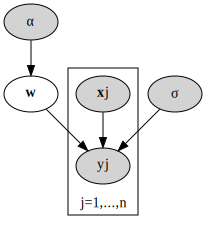

In [1]:
from graphviz import Digraph
g = Digraph('bayes_regression')
g.node('alpha', label='<&alpha;>', style='filled')
g.node('w', label='<<b>w</b>>')
g.node('sigma', label='<&sigma;>', style='filled')
with g.subgraph(name='cluster_0') as sg:
    sg.node('xj', label='<<b>x</b><sub>j</sub>>', style='filled')
    sg.node('yj', label='<y<sub>j</sub>>', style='filled')
    sg.attr(label='j=1,...,n')
    sg.attr(labelloc='b')
g.edge('alpha', 'w')
g.edge('sigma', 'yj')
g.edge('w', 'yj')
g.edge('xj', 'yj')
g.render('bayes_regression', format='png')
g

### The Posterior of the Weights

Combining the likelihood and the prior, we get using Bayes' rule:
$$
p(\mathbf{w}|\mathbf{x}_{1:n},\mathbf{y}_{1:n}, \sigma,\alpha) = 
\frac{p(\mathbf{y}_{1:n}|\mathbf{x}_{1:n}, \mathbf{w}, \sigma)p(\mathbf{w}|\alpha)}
{\int p(\mathbf{y}_{1:n}|\mathbf{x}_{1:n}, \mathbf{w}', \sigma)p(\mathbf{w}'|\alpha)d\mathbf{w}'}.
$$
The posterior summarizes our state of knowledge about $\mathbf{w}$ after we see the data,
if we know $\alpha$ and $\sigma$.

### Maximum Posterior Estimate
We can find a point estimate of $\mathbf{w}$ by solving:
$$
\mathbf{w}_{\mbox{MPE}} = \arg\max_{\mathbf{w}} p(\mathbf{y}_{1:n}|\mathbf{x}_{1:n}, \mathbf{w}, \sigma)p(\mathbf{w}|\alpha).
$$
For Gaussian likelihood and weight prior, the logarithm of the posterior is:
$$
\log p(\mathbf{w}|\mathbf{x}_{1:n},\mathbf{y}_{1:n}, \sigma,\alpha) = 
- \frac{1}{2\sigma^2}\lVert\mathbf{\Phi}\mathbf{w}-\mathbf{y}_{1:n}\rVert^2 -\frac{\alpha}{2}\lVert\mathbf{w}\rVert^2.
$$
Taking derivatives with respect to $\mathbf{w}$ and setting them equal to zero (necessary condition), we find:
$$
\mathbf{w}_{\mbox{MPE}} = \sigma^{-2}\left(\sigma^{-2}\mathbf{\Phi}^T\mathbf{\Phi}+\alpha\mathbf{I}\right)^{-1}\mathbf{\Phi}^T\mathbf{y}_{1:n}.
$$
Unfortunately, we no longer have an analytic formula for $\sigma$... (we will fix that later).

### Examples

After watching the video, see [Hands-on Activity 14.2](https://colab.research.google.com/github/PredictiveScienceLab/data-analytics-se/blob/master/activities/hands-on-14.2.ipynb).

## Probabilistic regression III (Bayesian linear regression)

This has the same setup version III of probabilistic regression but we do not just get a point estimate for the weights.
We retain the posterior of the weughts in its full complexity.
The adendum is that we can now quantify the epistemic uncertainty induced by the limited number of observations used to estimate the weights.

For Gaussian likelihood and weight prior, the posterior of the weights is Gaussian:
$$
p(\mathbf{w}|\mathbf{x}_{1:n},\mathbf{y}_{1:n}, \sigma, \alpha) = \mathcal{N}\left(\mathbf{w}|\mathbf{m}, \mathbf{S}\right),
$$
where
$$
\mathbf{S} = \left(\sigma^{-2}\mathbf{\Phi}^T\mathbf{\Phi}+\alpha\mathbf{I}\right)^{-1},
$$
and
$$
\mathbf{m} = \sigma^{-2}\mathbf{S}\Phi^T\mathbf{y}_{1:n}.
$$
In the general case of non-Gaussian likelihood (and non-linear models), the posterior will not be analytically available. We will learn how to deal with these cases in Lectures 27 and 28 when we talk about generic ways to characterize posteriors.

### Posterior Predictive Distribution
Using probability theory, we ask: What do we know about $y$ at a new $\mathbf{x}$ after seeing the data.
To answer this question, we just use the sum rule:
$$
p(y|\mathbf{x}, \mathbf{x}_{1:n}, \mathbf{y}_{1:n}, \sigma, \alpha) = 
\int p(y | \mathbf{x}, \mathbf{w}, \sigma) p(\mathbf{w}|\mathbf{x}_{1:n}, \mathbf{y}_{1:n},\sigma,\alpha)d\mathbf{w}.
$$
For the all-Gaussian case, this is analytically available:
$$
p(y|\mathbf{x}, \mathbf{x}_{1:n}, \mathbf{y}_{1:n}, \sigma, \alpha) = \mathcal{N}\left(y|m(\mathbf{x}), s^2(\mathbf{x})\right),
$$
where
$$
m(\mathbf{x}) = \mathbf{m}^T\boldsymbol{\phi}(\mathbf{x})\;\mbox{and}\;s(\mathbf{x}) = \boldsymbol{\phi}(\mathbf{x})^T\mathbf{S}\boldsymbol{\phi}(\mathbf{x}) + \sigma^2.
$$

Notice that the **predictive uncertainty** is:
$$
s^2(\mathbf{x}) = \boldsymbol{\phi}(\mathbf{x})^T\mathbf{S}\boldsymbol{\phi}(\mathbf{x}) + \sigma^2,
$$
where:
+ $\sigma^2$ corresponds to the measurement noise.
+ $\boldsymbol{\phi}(\mathbf{x})^T\mathbf{S}\boldsymbol{\phi}(\mathbf{x})$ is the epistemic uncertainty induced by limited data.